<a href="https://colab.research.google.com/github/nguyenhson03/Customer-churn-prediction-model/blob/main/Mohinhkhachhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nhập thư viện**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

**Nhập tập dữ liệu**

In [3]:
data = pd.read_csv('/content/Churn_Modelling.csv')

data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# Kiểm tra xem tập dữ liệu của chúng tôi có chứa bất kỳ giá trị NULL nào không
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Phân tích dữ liệu**

In [8]:
data['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


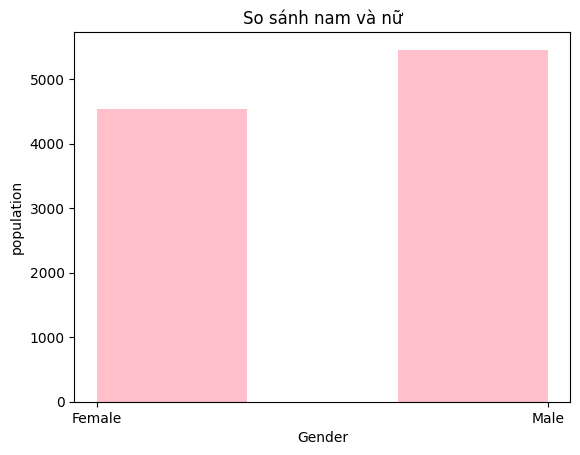

In [10]:
# Vẽ đồ thị các đặc điểm của tập dữ liệu để thấy mối tương quan giữa chúng

plt.hist(x = data.Gender, bins = 3, color = 'pink')
plt.title('So sánh nam và nữ')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [11]:
data['Age'].value_counts()

,count
Age,
37,478
38,477
35,474
36,456
34,447
...,...
84,2
82,1
88,1


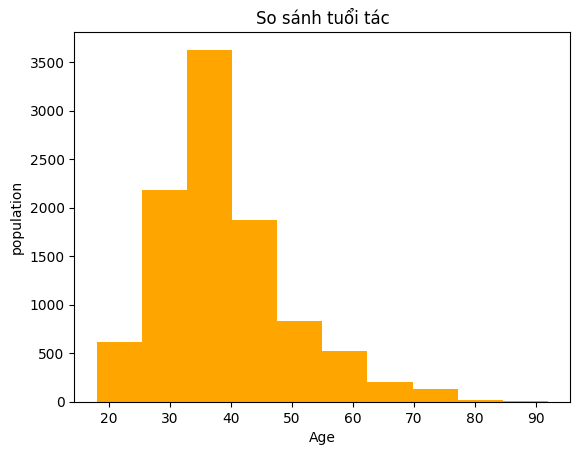

In [12]:
# so sánh độ tuổi trong tập dữ liệu

plt.hist(x = data.Age, bins = 10, color = 'orange')
plt.title('So sánh tuổi tác')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [13]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


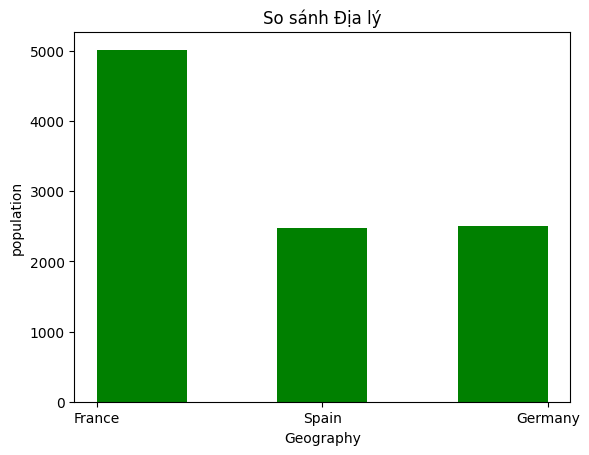

In [14]:
# so sánh địa lý

plt.hist(x = data.Geography, bins = 5, color = 'green')
plt.title('So sánh Địa lý')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

In [15]:
data['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


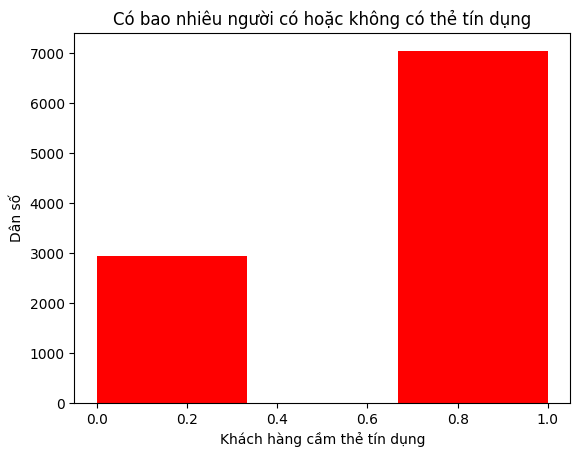

In [16]:
# so sánh số lượng khách hàng giữ thẻ tín dụng

plt.hist(x = data.HasCrCard, bins = 3, color = 'red')
plt.title('Có bao nhiêu người có hoặc không có thẻ tín dụng')
plt.xlabel('Khách hàng cầm thẻ tín dụng')
plt.ylabel('Dân số')
plt.show()

In [17]:
data['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


<Axes: xlabel='Gender'>

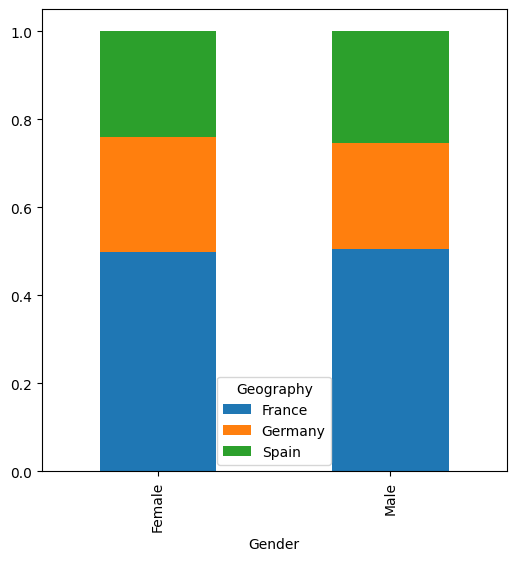

In [18]:
# so sánh giữa Địa lý và Giới tính

Gender = pd.crosstab(data['Gender'],data['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

<Axes: xlabel='HasCrCard'>

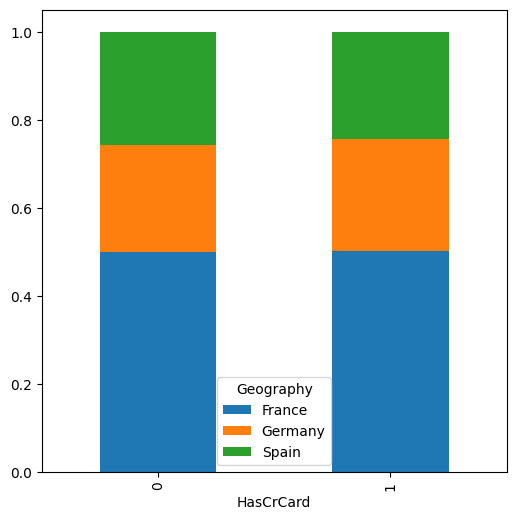

In [19]:
# so sánh giữa địa lý và chủ thẻ

HasCrCard = pd.crosstab(data['HasCrCard'], data['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                            stacked = True,figsize = (6, 6))

<Axes: xlabel='IsActiveMember'>

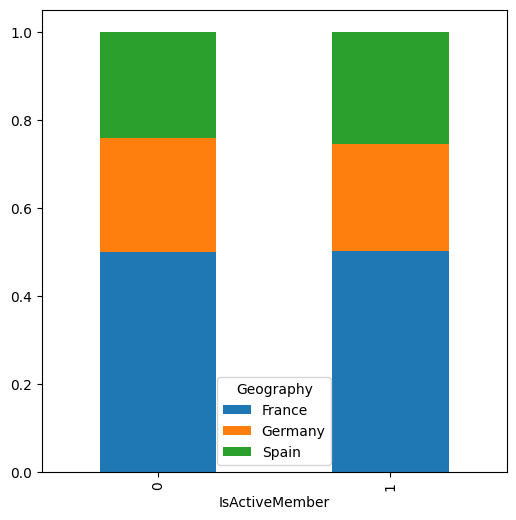

In [20]:
# so sánh thành viên tích cực ở các khu vực địa lý khác nhau

IsActiveMember = pd.crosstab(data['IsActiveMember'], data['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = True, figsize= (6, 6))

<Axes: xlabel='Age'>

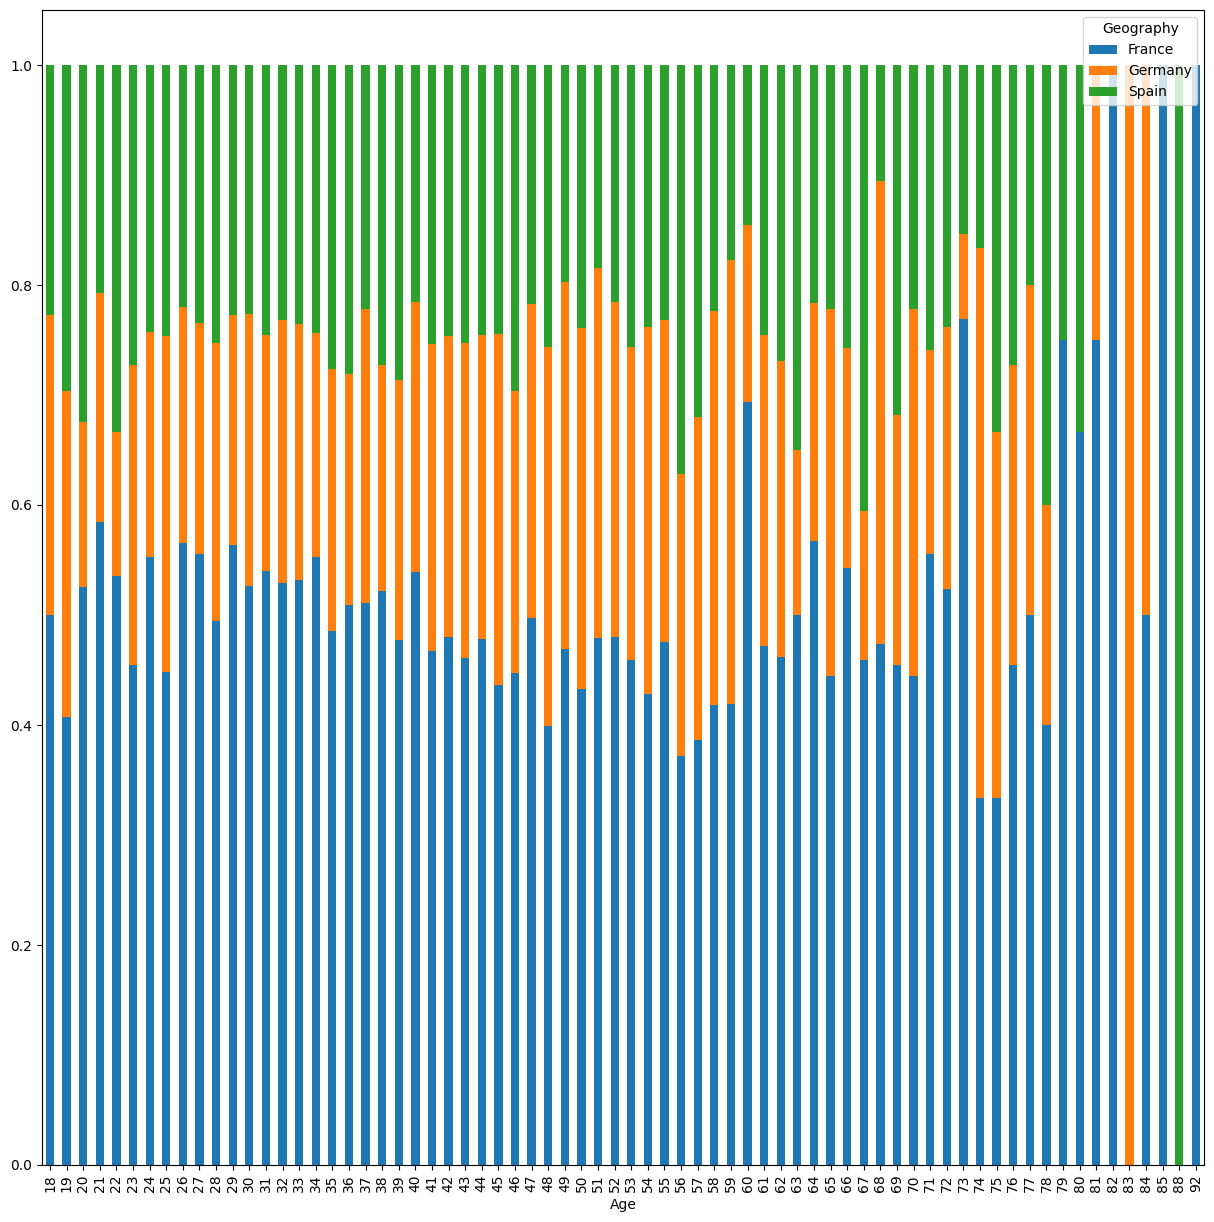

In [21]:
# so sánh độ tuổi ở các vùng địa lý khác nhau

Age = pd.crosstab(data['Age'], data['Geography'])
Age.div(Age.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                           stacked = True, figsize = (15,15))

In [22]:
# tính tổng số dư ở Pháp, Đức và Tây Ban Nha

total_france = data.Balance[data.Geography == 'France'].sum()
total_germany = data.Balance[data.Geography == 'Germany'].sum()
total_spain = data.Balance[data.Geography == 'Spain'].sum()

print("Tổng số dư ở Pháp :",total_france)
print("Tổng số dư ở Đức :",total_germany)
print("Tổng số dư ở Tây Ban Nhan :",total_spain)

Tổng số dư ở Pháp : 311332479.49
Tổng số dư ở Đức : 300402861.38
Tổng số dư ở Tây Ban Nhan : 153123552.01


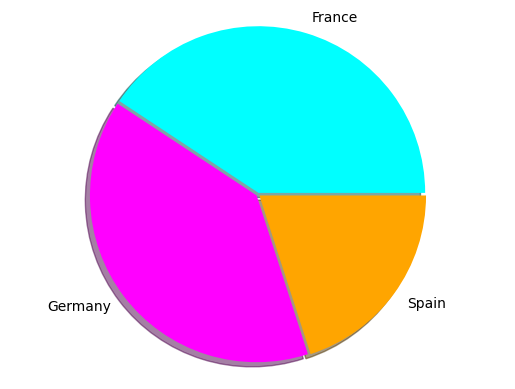

In [23]:
# vẽ biểu đồ hình tròn

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

**Tiền xử lý dữ liệu**

In [24]:
# Loại bỏ các tính năng không cần thiết khỏi tập dữ liệu

data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)



print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [25]:
data.shape

(10000, 11)

In [26]:
# chia tập dữ liệu thành x (biến độc lập) và y (biến phụ thuộc)

x = data.iloc[:,0:10]
y = data.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)
#print(y)

(10000, 10)
(10000,)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [27]:
# Mã hóa các biến phân loại thành biến số
# Một mã hóa nóng
x = pd.get_dummies(x)

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [28]:
x.shape

(10000, 13)

In [29]:
# chia dữ liệu thành tập huấn luyện và kiểm tra

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 13)
(7500,)
(2500, 13)
(2500,)


In [30]:
# Chia tỷ lệ tính năng
# Chỉ trên Biến độc lập để chuyển đổi chúng thành các giá trị trong khoảng từ -1 đến +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.735507,0.015266,0.008860,0.673160,2.535034,-1.553624,-1.034460,-1.640810,-1.015588,1.760216,-0.574682,1.087261,-1.087261
1,1.024427,-0.652609,0.008860,-1.207724,0.804242,0.643657,-1.034460,-0.079272,0.984651,-0.568112,-0.574682,1.087261,-1.087261
2,0.808295,-0.461788,1.393293,-0.356937,0.804242,0.643657,0.966688,-0.996840,-1.015588,-0.568112,1.740094,1.087261,-1.087261
3,0.396614,-0.080145,0.008860,-0.009356,-0.926551,0.643657,0.966688,-1.591746,-1.015588,-0.568112,1.740094,-0.919743,0.919743
4,-0.467915,1.255605,0.701077,-1.207724,0.804242,0.643657,0.966688,1.283302,0.984651,-0.568112,-0.574682,-0.919743,0.919743


**Thiết lập Mô hình**

**Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuaracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.8028
[[1720  271]
 [ 222  287]]


**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9998666666666667
Testing Accuracy : 0.8664
[[1912   79]
 [ 255  254]]


In [33]:
# xác thực chéo k gấp

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print(cvs)

[0.86133333 0.85066667 0.85733333 0.85733333 0.856      0.84666667
 0.86       0.86       0.85466667 0.86133333]


**Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8096
Testing Accuracy : 0.8092
[[1916   75]
 [ 402  107]]


**Support Vector Machine**

In [35]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8625333333333334
Testing Accuracy : 0.8616
[[1951   40]
 [ 306  203]]


**Multi Layer Perceptron**

In [36]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (100, 100), activation ='relu',
                      solver = 'adam', max_iter = 50)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8878666666666667
Testing Accuracy : 0.8636
[[1903   88]
 [ 253  256]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


**Aritificial Neural Networks**

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [39]:
model = Sequential()

# lớp ẩn 1
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=13))

# lớp ẩn 2
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# lớp ẩn 3
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# lớp ẩn 4
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# lớp ẩn 5
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# lớp ẩn đẩu ra
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model (đào tạo)
model.fit(x_train, y_train, batch_size = 10, epochs = 50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7915 - loss: 0.5658
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7947 - loss: 0.4403
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7979 - loss: 0.4138
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8064 - loss: 0.4358
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8279 - loss: 0.4125
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8251 - loss: 0.4184
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8355 - loss: 0.4080
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8346 - loss: 0.4108
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8337 - loss: 0.4117
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8298 - loss: 0.4116
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8326 - loss: 0.4136
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [40]:
from keras.layers import Dense, Dropout

# Khởi tạo mô hình
model = Sequential()

# Lớp ẩn đầu tiên
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=13))
model.add(Dropout(0.5))

# Lớp ẩn thứ hai
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))

# Lớp đầu ra
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(x_train, y_train, batch_size=10, epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8001 - loss: 0.5808
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7977 - loss: 0.4638
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7951 - loss: 0.4687
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7931 - loss: 0.4609
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8010 - loss: 0.4551
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8008 - loss: 0.4522
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7970 - loss: 0.4589
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7951 - loss: 0.4530
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7946 - loss: 0.4569
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7993 - loss: 0.4600
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8039 - loss: 0.4426
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Tạo mô hình
model = Sequential()

# Lớp ẩn đầu tiên
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=13))
model.add(Dropout(0.1))

# Lớp ẩn thứ hai
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))

# Lớp đầu ra
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(x_train, y_train, batch_size=10, epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7874 - loss: 0.5696
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7887 - loss: 0.4539
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7966 - loss: 0.4339
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7977 - loss: 0.4338
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7917 - loss: 0.4325
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8012 - loss: 0.4325
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7948 - loss: 0.4369
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8246 - loss: 0.4135
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8242 - loss: 0.4353
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8232 - loss: 0.4250
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8322 - loss: 0.4122
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

In [43]:
from keras.models import Sequential
from keras.layers import Dense

# Tạo mô hình
model = Sequential()

# Lớp ẩn đầu tiên
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=13))

# Lớp ẩn thứ hai
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# Lớp đầu ra
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(x_train, y_train, batch_size=10, epochs=49)

Epoch 1/49


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7880 - loss: 0.5720
Epoch 2/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7939 - loss: 0.4348
Epoch 3/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7956 - loss: 0.4252
Epoch 4/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7889 - loss: 0.4297
Epoch 5/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8107 - loss: 0.4187
Epoch 6/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8327 - loss: 0.4030
Epoch 7/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8240 - loss: 0.4179
Epoch 8/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8345 - loss: 0.4033
Epoch 9/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8260 - loss: 0.4100
Epoch 10/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8301 - loss: 0.4153
Epoch 11/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8359 - loss: 0.3995
Epoch 12/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

In [44]:
'''
Dự đoán khách hàng có thông tin sau sẽ rời ngân hàng hay không ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = model.predict(sc.transform(np.array([[850, 50, 4, 150000, 5, 1, 1, 85000, 1, 0, 0, 1, 0]])))

new_prediction = (new_prediction > 0.5 )
print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[False]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
# cài đặt thư viện mô hình Keras với API scikit-learn
!pip install scikeras[tensorflow]

In [50]:
!pip install -U scikeras scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 89.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [1]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Preprocessing
sc = StandardScaler()
X = sc.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model builder
def build_classifier():
    model = Sequential()
    model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=X.shape[1]))
    model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap with Scikeras
model = KerasClassifier(model=build_classifier, batch_size=10, epochs=50, verbose=0)

# Evaluate
accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=10, n_jobs=-1)
print("Mean accuracy: {:.2f}%, Std dev: {:.2f}%".format(accuracies.mean()*100, accuracies.std()*100))


Mean accuracy: 97.59%, Std dev: 2.66%


In [2]:
print("Accuracies :", accuracies)

print("Mean Accuracy :", accuracies.mean())
print("Variance :", accuracies.std())

Accuracies : [0.91304348 1.         1.         0.97826087 0.95652174 0.95555556
 0.97777778 1.         1.         0.97777778]
Mean Accuracy : 0.9758937198067633
Variance : 0.02660116754709259
